In [1]:
# For data wrangling
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Widen rows and columns displayed
pd.options.display.max_rows = 30
pd.options.display.max_columns = 20

# Dataset Review & Preparation

In [41]:
# Read the data frame
df = pd.read_csv('https://raw.githubusercontent.com/renaisbintang/Churn_Modelling/main/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
# Check columns list and missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# Set unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
# Drop the columns as explained above
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [7]:
# Review the top rows of what is left of the data frame
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Check statistical description (numerical)
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
# Check statistical description (categorical)
df.describe(include = 'object')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [10]:
# Check variable data types
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Exploratory Data Analysis

## Features vs Targets

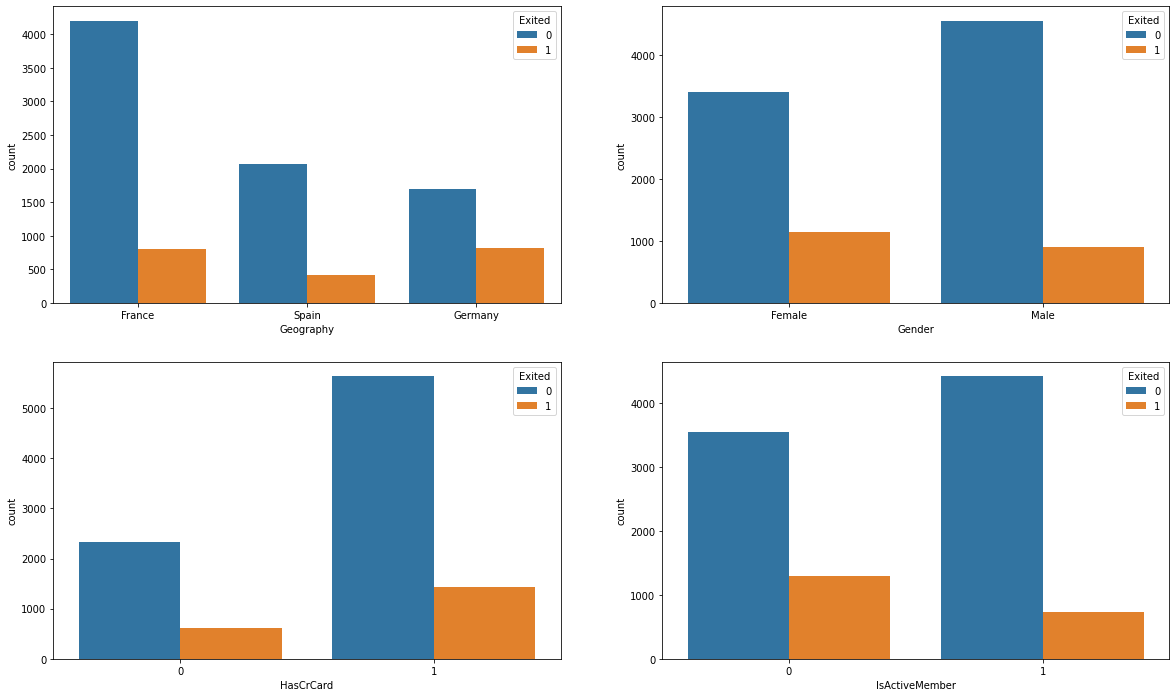

In [11]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited', data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited', data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited', data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited', data = df, ax=axarr[1][1])

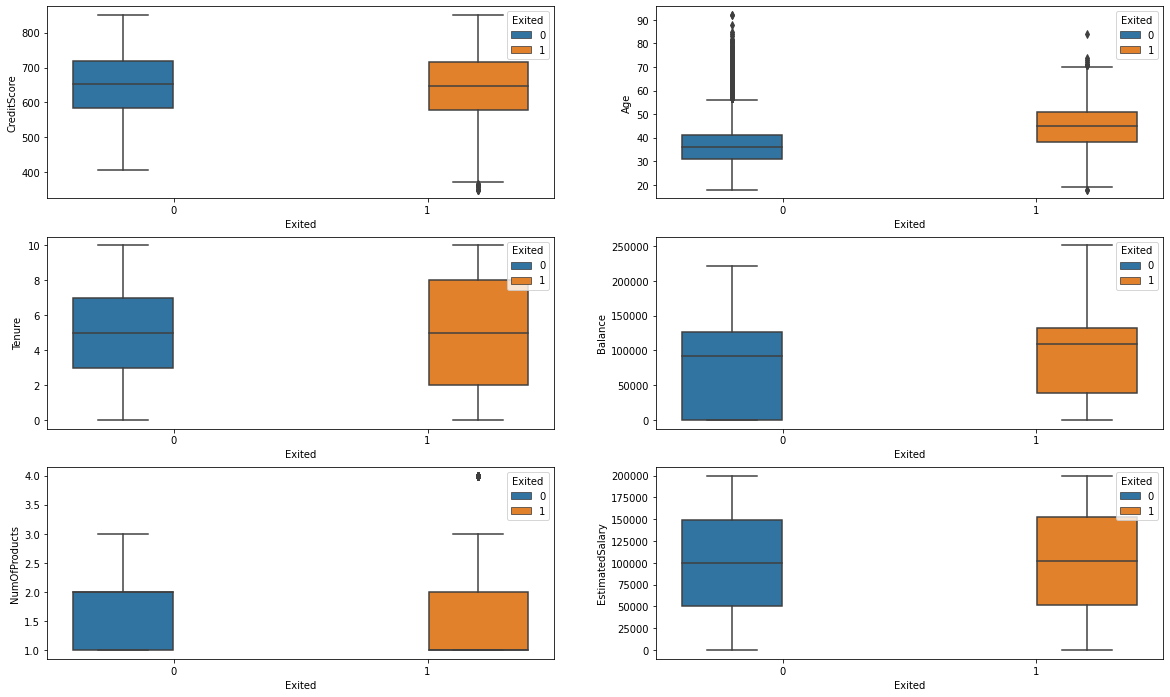

In [12]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore', x = 'Exited', hue = 'Exited', data = df, ax=axarr[0][0])
sns.boxplot(y='Age', x = 'Exited', hue = 'Exited', data = df, ax=axarr[0][1])
sns.boxplot(y='Tenure', x = 'Exited', hue = 'Exited', data = df, ax=axarr[1][0])
sns.boxplot(y='Balance', x = 'Exited', hue = 'Exited', data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts', x = 'Exited', hue = 'Exited', data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary', x = 'Exited', hue = 'Exited', data = df, ax=axarr[2][1])

## Correlation Matrix

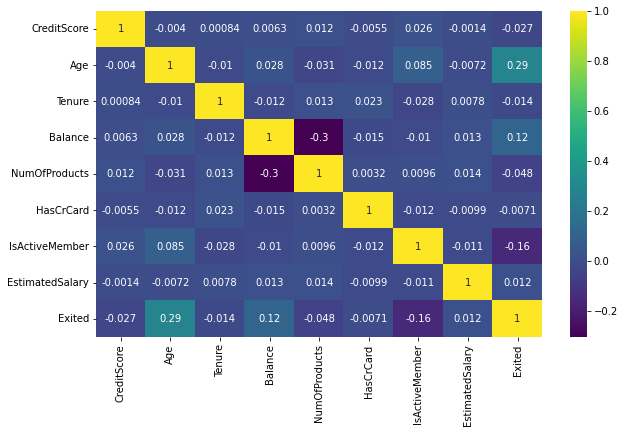

In [13]:
# Exited correlation matrix
cm = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

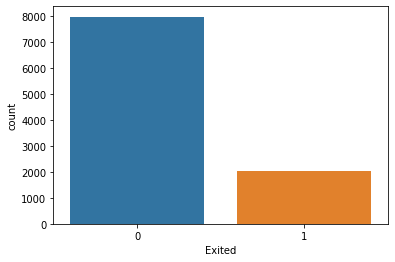

In [14]:
sns.countplot(x='Exited', data = df)

# Feature Engineering

In [15]:
df_fe = df.copy()

In [16]:
# Balance Salary Ratio
df_fe['BalanceSalaryRatio'] = df_fe['Balance']/df_fe['EstimatedSalary']

# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
df_fe['TenureByAge'] = df_fe['Tenure']/(df_fe['Age'])

# Credit score given age to take into account credit behaviour visavis adult life
df_fe['CreditScoreGivenAge'] = df_fe['CreditScore']/(df_fe['Age'])

In [17]:
# Resulting Data Frame
df_fe.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442


# Data Preparation For Model Fitting

In [18]:
# One hot encode the categorical variables
from sklearn.preprocessing import OneHotEncoder
lst = ['Geography', 'Gender']
ohe = OneHotEncoder()
ohe.fit(df_fe[lst])
df_ohe_res = pd.DataFrame(ohe.transform(df_fe[lst]).toarray(),
                          columns = ohe.get_feature_names_out())
df_fe = pd.concat([df_fe, df_ohe_res], axis=1)
df_fe.drop(columns=lst, inplace=True)
df_fe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442,0.0,0.0,1.0,1.0,0.0


In [19]:
# minMax scaling the continuous variables
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(df_fe) 
df_fe = pd.DataFrame(mm.transform(df_fe), columns=df_fe.columns) 

df_fe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.000000,0.085714,0.235083,1.0,0.0,0.0,1.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.000070,0.043902,0.237252,0.0,0.0,1.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.000132,0.342857,0.168807,1.0,0.0,0.0,1.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.000000,0.046154,0.310859,1.0,0.0,0.0,1.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.000150,0.083721,0.354739,0.0,0.0,1.0,1.0,0.0


In [20]:
from sklearn.model_selection import train_test_split

# Split Train, test date
X = df_fe.drop(columns=['Exited']).copy()
y = df_fe['Exited'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42)

print(len(X_train))
print(len(X_test))

7500
2500


In [21]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
4901,0.646,0.554054,0.0,0.709683,0.333333,0.0,1.0,0.105271,0.000796,0.000000,0.155826,1.0,0.0,0.0,0.0,1.0
4375,1.000,0.310811,0.8,0.242651,0.000000,1.0,0.0,0.159086,0.000180,0.351220,0.377680,0.0,1.0,0.0,0.0,1.0
6698,0.750,0.175676,0.6,0.000000,0.000000,0.0,0.0,0.306604,0.000000,0.348387,0.440856,1.0,0.0,0.0,1.0,0.0
9805,0.588,0.202703,0.7,0.695786,0.000000,0.0,1.0,0.219679,0.000374,0.381818,0.348737,1.0,0.0,0.0,0.0,1.0
1101,0.706,0.148649,0.9,0.000000,0.333333,1.0,0.0,0.253364,0.000000,0.558621,0.461181,0.0,0.0,1.0,0.0,1.0


# Model Fitting and Selection

In [23]:
# Fit models
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## Fit Best Models

In [24]:
# Fit Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [25]:
# Fit SVM
svm = SVC(probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

In [26]:
# Fit Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

## Review Best Model Fit Accuracy

In [27]:
# Gradient Boosting
y_pred_gbc = gbc.predict(X_test)
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      2003
         1.0       0.77      0.47      0.59       497

    accuracy                           0.87      2500
   macro avg       0.82      0.72      0.75      2500
weighted avg       0.86      0.87      0.85      2500



In [28]:
# SVM
y_pred_svm = svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91      2003
         1.0       0.81      0.23      0.35       497

    accuracy                           0.84      2500
   macro avg       0.82      0.61      0.63      2500
weighted avg       0.83      0.84      0.80      2500



In [29]:
# Decision Tree
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      2003
         1.0       0.47      0.51      0.49       497

    accuracy                           0.79      2500
   macro avg       0.68      0.69      0.68      2500
weighted avg       0.80      0.79      0.79      2500



In [30]:
def get_auc_scores(y_actual, y_pred, y_proba):
  auc_score = roc_auc_score(y_actual, y_pred);
  fpr_df, tpr_df, _ = roc_curve(y_actual, y_proba);
  return (auc_score, fpr_df, tpr_df)

In [31]:
auc_gbc, fpr_gbc, tpr_gbc = get_auc_scores(y,
                                           gbc.predict(X),
                                           gbc.predict_proba(X)[:,1])
auc_svm, fpr_svm, tpr_svm = get_auc_scores(y,
                                           svm.predict(X),
                                           svm.predict_proba(X)[:,1])
auc_dt, fpr_dt, tpr_dt = get_auc_scores(y,
                                        dt.predict(X),
                                        dt.predict_proba(X)[:,1])

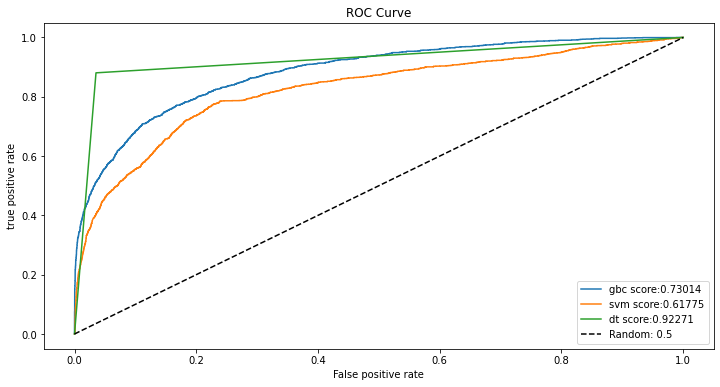

In [32]:
plt.figure(figsize = (12,6), linewidth=1)
plt.plot(fpr_gbc, tpr_gbc, label = 'gbc score:' + str(round(auc_gbc, 5)))
plt.plot(fpr_svm, tpr_svm, label = 'svm score:' + str(round(auc_svm, 5)))
plt.plot(fpr_dt, tpr_dt, label = 'dt score:' + str(round(auc_dt, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

## Resampling To Handle Imbalanced Dataset

In [33]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [34]:
y_train.value_counts()

0.0    5960
1.0    1540
Name: Exited, dtype: int64

In [35]:
y_smote.value_counts()

1.0    5960
0.0    5960
Name: Exited, dtype: int64

In [36]:
dt_smote = DecisionTreeClassifier()
dt_smote.fit(X_smote, y_smote)

DecisionTreeClassifier()

In [37]:
y_pred_smote = dt_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85      2003
         1.0       0.43      0.55      0.49       497

    accuracy                           0.77      2500
   macro avg       0.66      0.69      0.67      2500
weighted avg       0.79      0.77      0.78      2500



## Feature Importance

<BarContainer object of 16 artists>

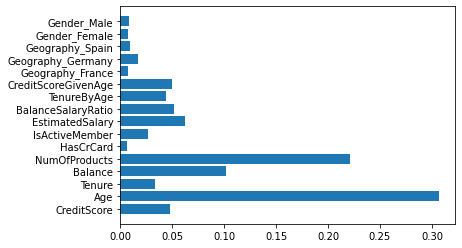

In [38]:
fi = dt_smote.feature_importances_
col = X_train.columns
plt.barh(col, fi)

In [39]:
df.groupby('Exited')['Age'].mean()

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

In [40]:
pd.crosstab(df['NumOfProducts'], df['Exited'])

Exited,0,1
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60
